<a href="https://colab.research.google.com/github/surekavin/diabetic-prediction2/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.duplicated().sum()

3854

In [17]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Data types

In [14]:
#getting numerical and catagorical features from our dataset
num_features=[feature for feature in df.columns if df[feature].dtypes not in['0','o','object']]
cat_features=[feature for feature in df.columns if df[feature].dtypes in['0','o','object']]

In [15]:
num_features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [16]:
cat_features

['gender', 'smoking_history']

Data visualization

In [19]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

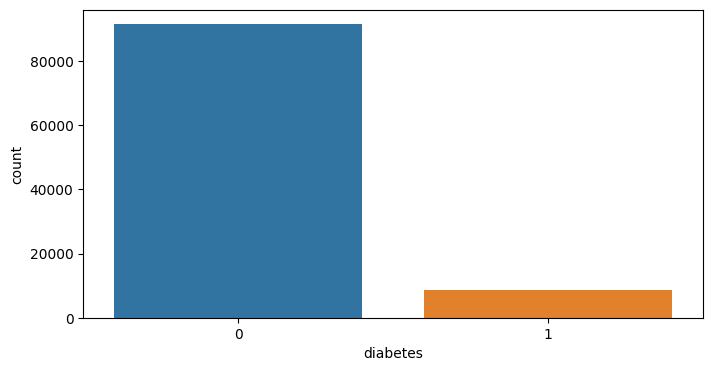

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x='diabetes', data=df)
plt.show()

infernce:
1)Our target varaible have only two class. 0 and 1. Here 0 and 1 represend not having diabetes and having diabetes respectilvey.
2)We can see that we have inblacne dataset.
3)We have to keep same ratio while we spliting our dataset into training and testing set.bold text

univeriant analysis

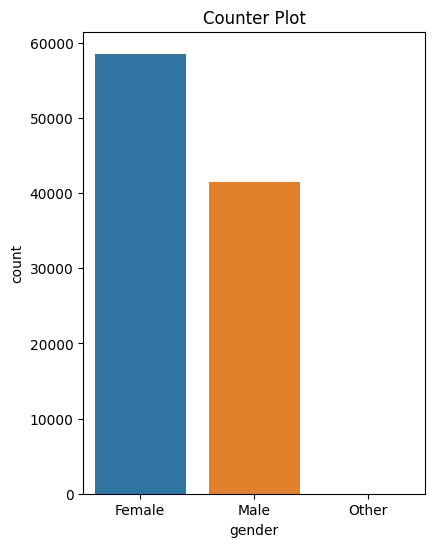

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'gender',data = df)



plt.show()

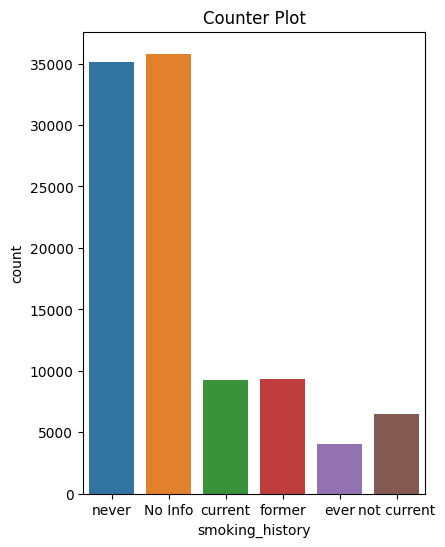

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'smoking_history',data = df)



plt.show()

<ipython-input-26-b8928b93ab2f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


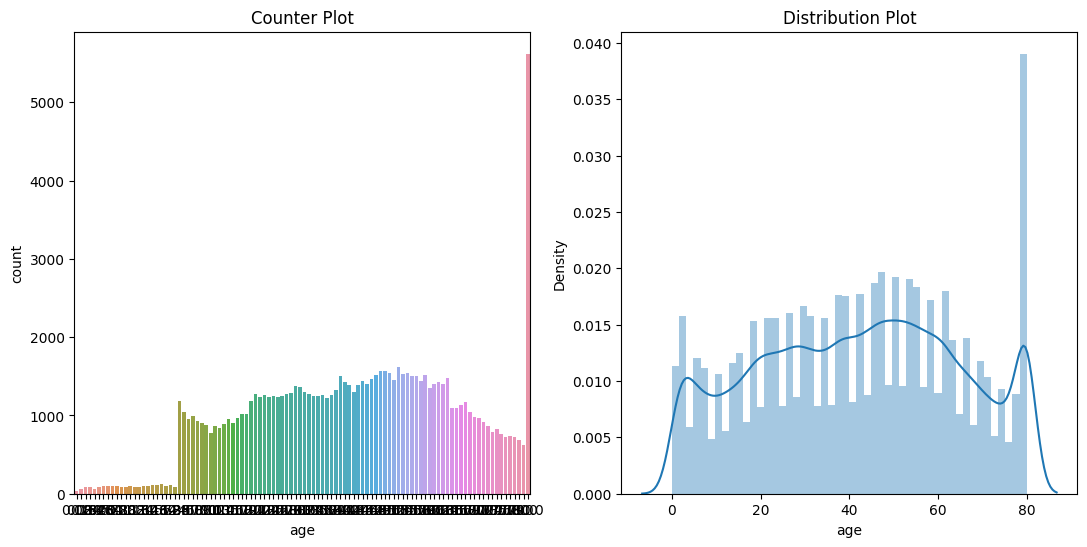

In [26]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'age',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["age"])


plt.show()

<ipython-input-27-21c45c26de01>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hypertension"])


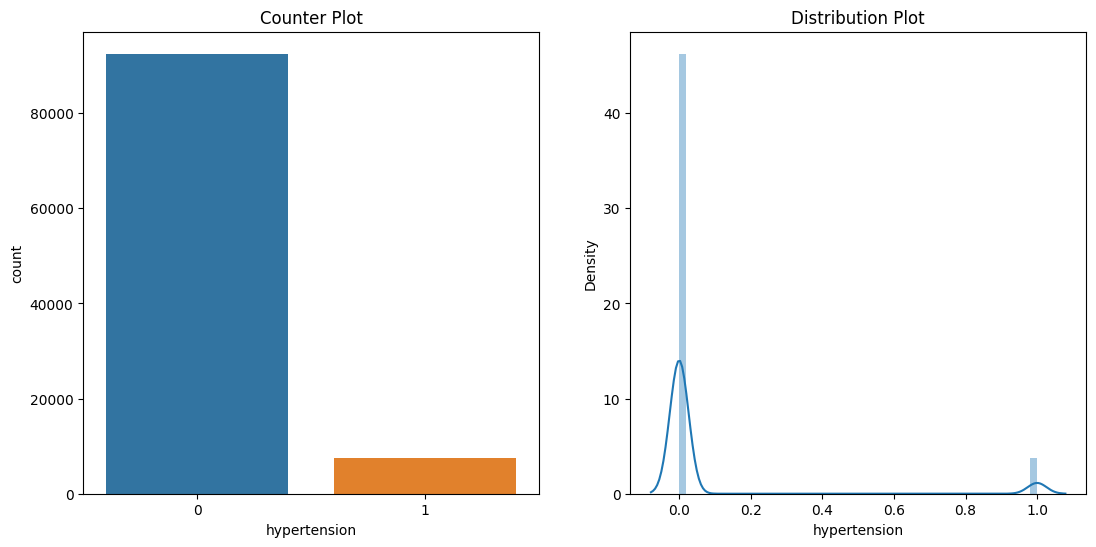

In [27]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'hypertension',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["hypertension"])


plt.show()

<ipython-input-28-48ea79254829>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["heart_disease"])


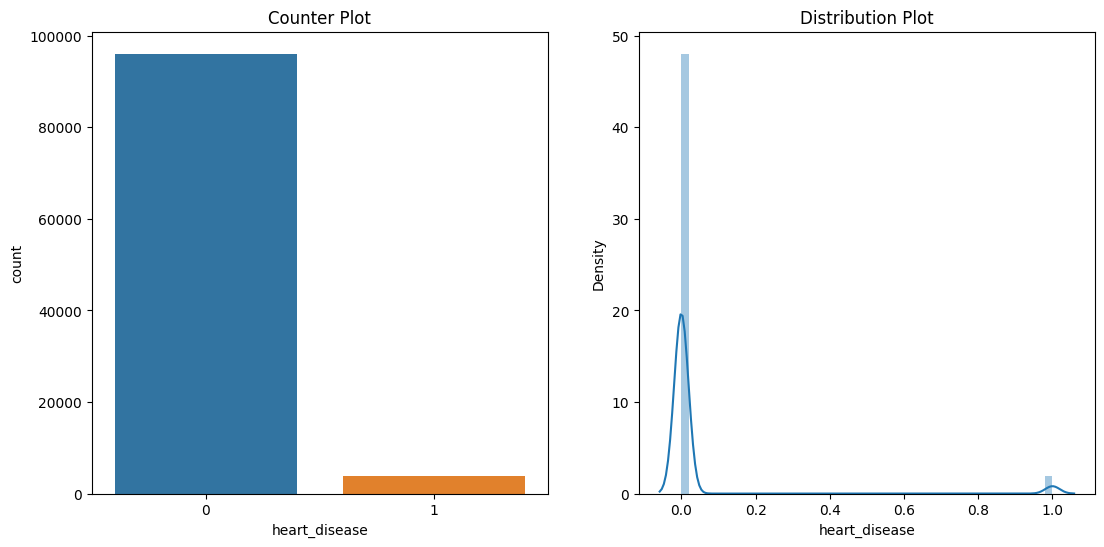

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'heart_disease',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["heart_disease"])


plt.show()

<ipython-input-29-7bcd11907132>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


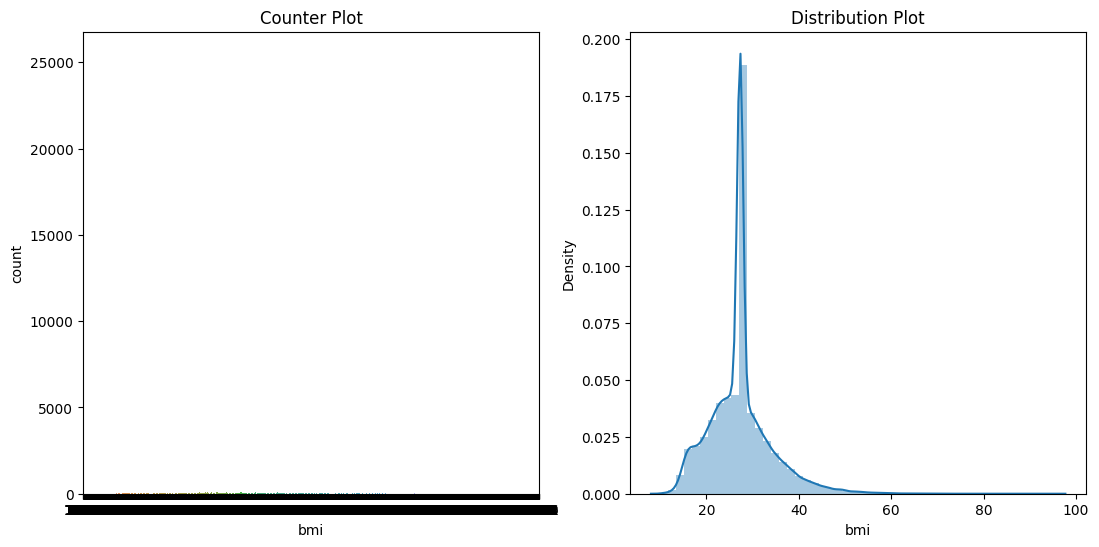

In [29]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'bmi',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["bmi"])


plt.show()

<ipython-input-30-2d376f203ae1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["HbA1c_level"])


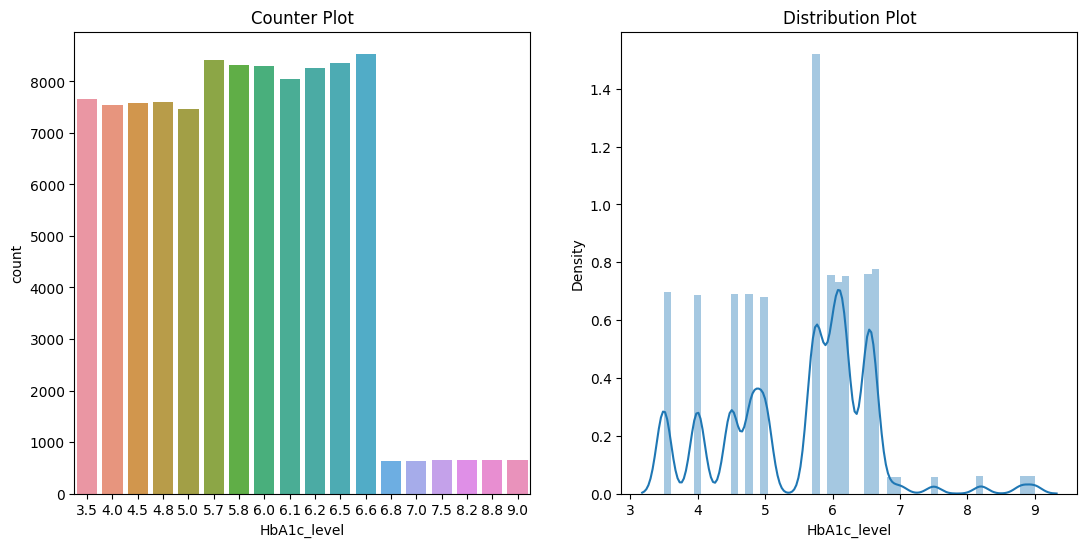

In [30]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'HbA1c_level',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["HbA1c_level"])


plt.show()

<ipython-input-31-66cde22b9410>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["blood_glucose_level"])


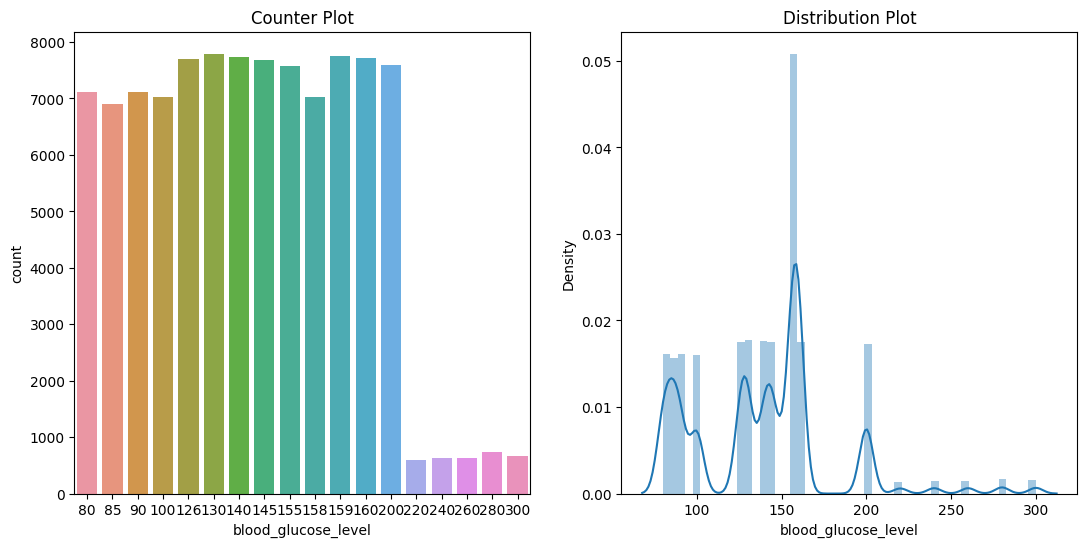

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'blood_glucose_level',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["blood_glucose_level"])


plt.show()

bivarient analysis

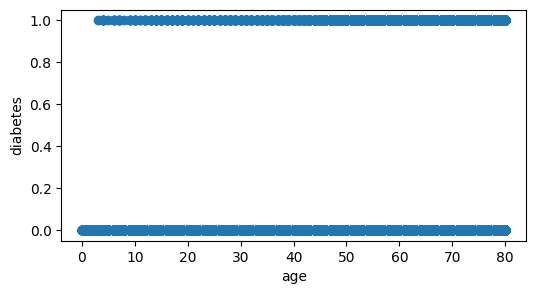

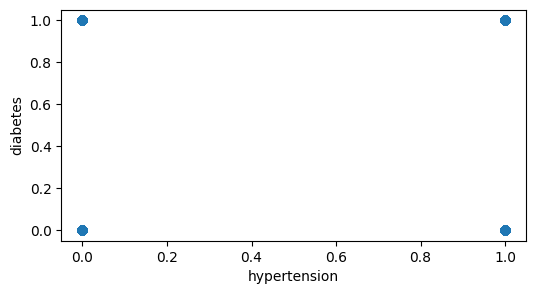

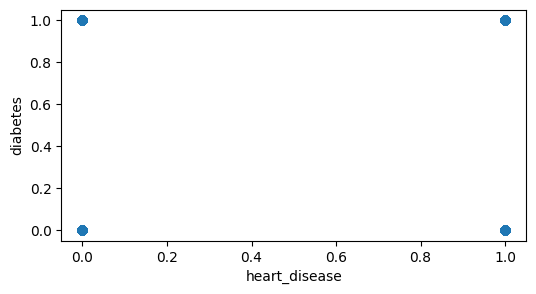

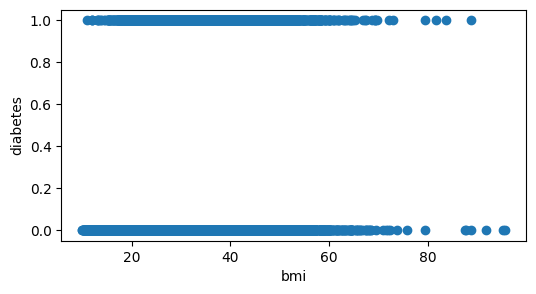

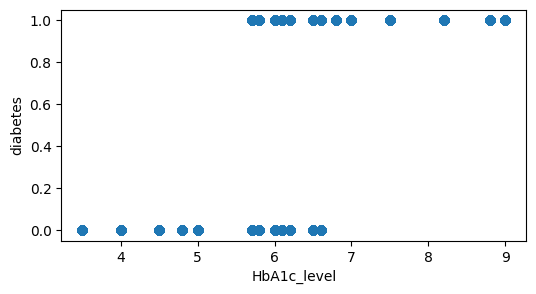

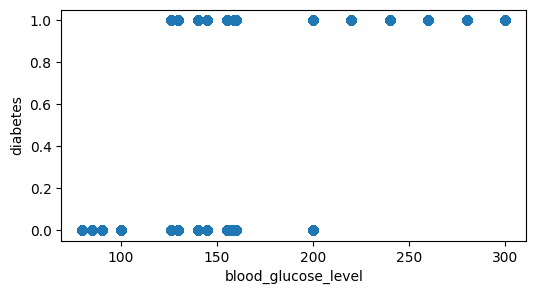

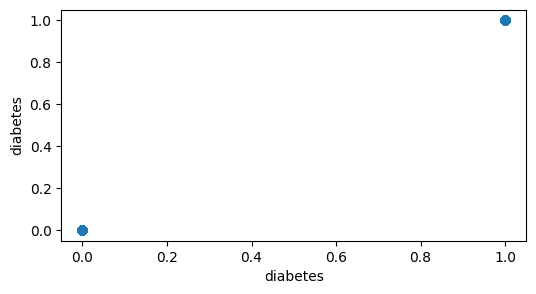

In [34]:
# Plotting the Relationship between target and features variables using scatter plot
for feature in num_features:
  plt.figure(figsize=(6,3))
  plt.scatter(y=df['diabetes'],x=df[feature])
  plt.ylabel('diabetes')
  plt.xlabel(feature)
  plt.show()


outliers
here outliers are good so need not to check outliers

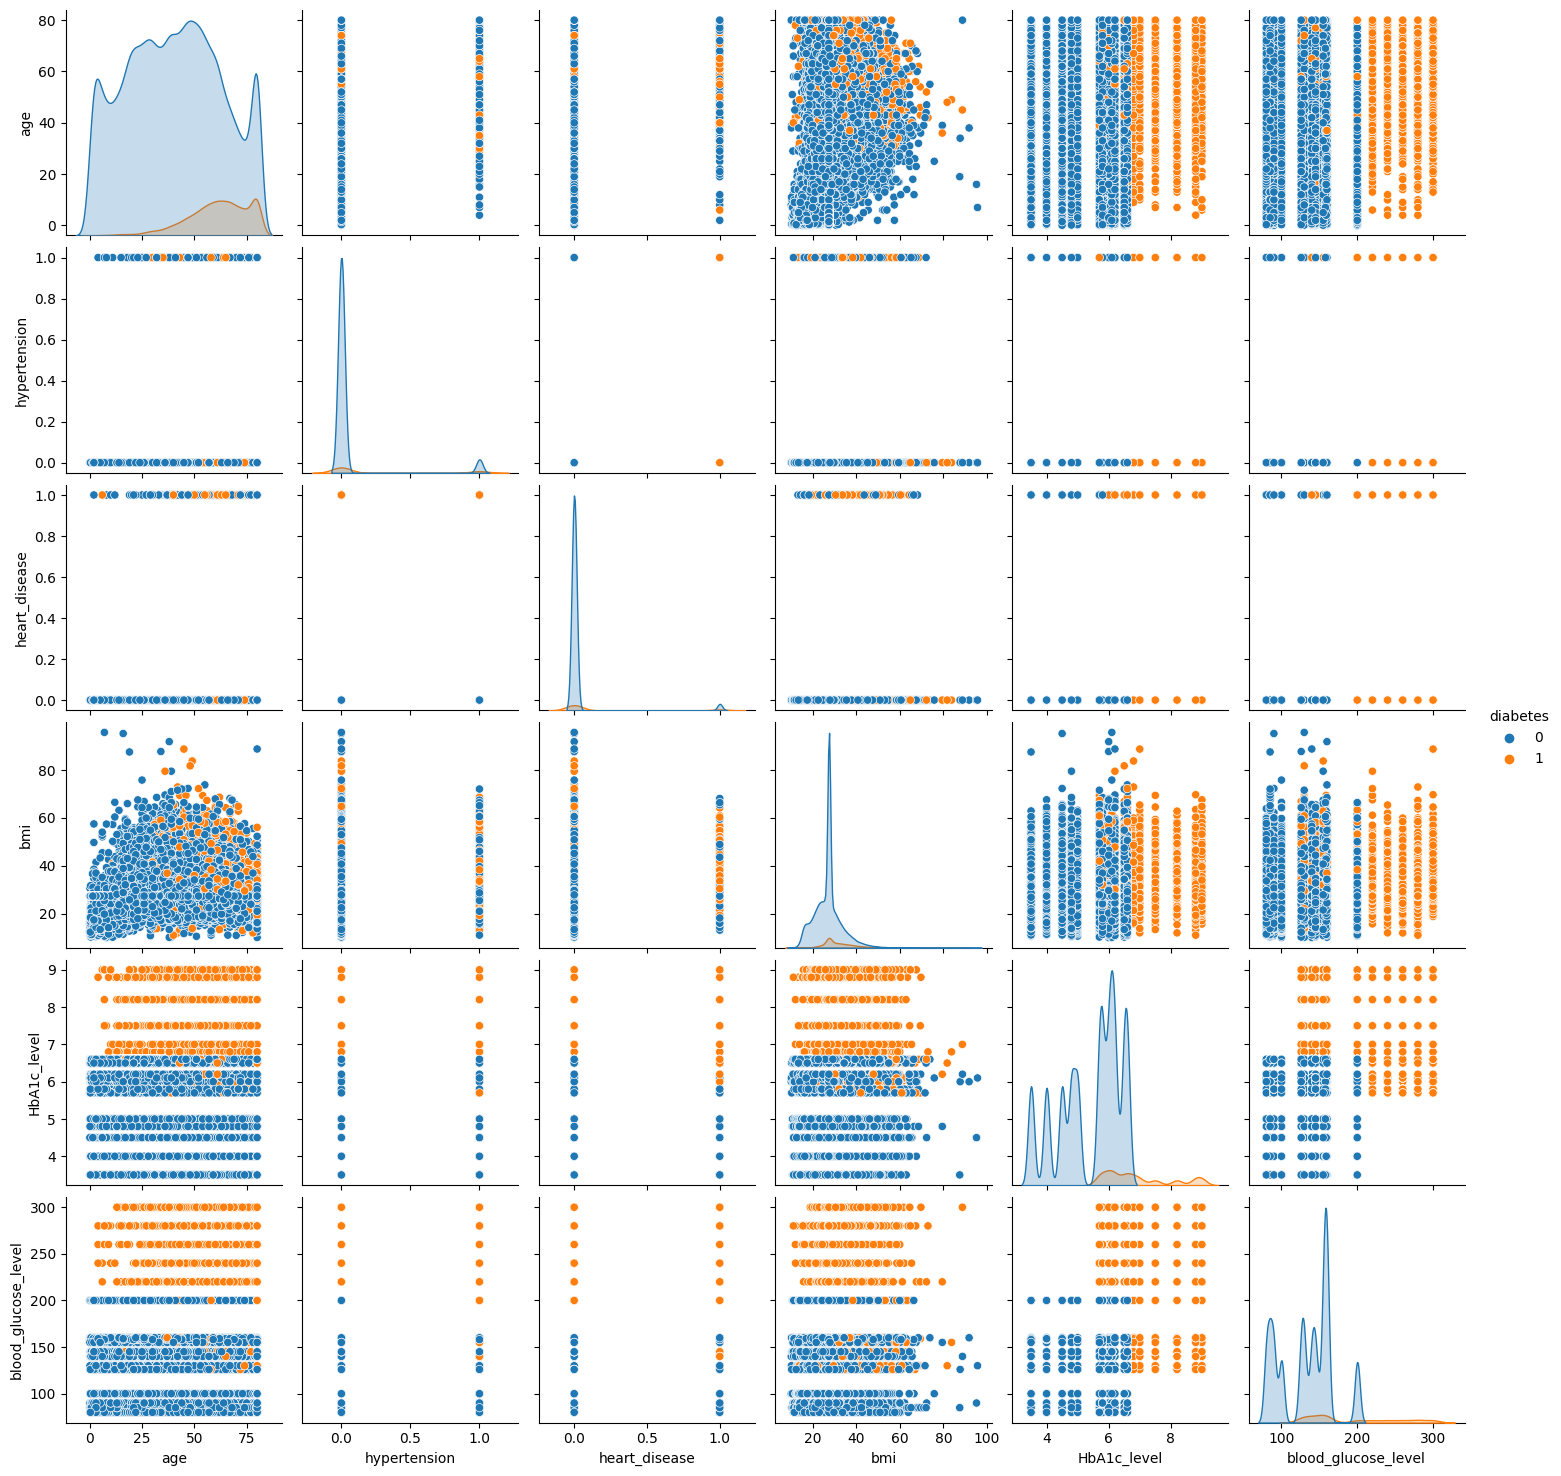

In [39]:
# Finding the relationship of each feature with others
sns.pairplot(df,hue='diabetes')
plt.show()

here it is the imbalance dataset hence balance the dataset

In [46]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [47]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])

df['gender'].unique()

array([0, 1, 2])

In [48]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [49]:
df['smoking_history']= label_encoder.fit_transform(df['smoking_history'])

df['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

spliting the dataset

In [51]:
col=[*df.columns]
col[:-1]

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [60]:
x=df.loc[:,col[:-2]].values
y=df.loc[:,col[-1]].values

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

balance the dataset

In [62]:
df.shape

(100000, 9)

In [63]:
len(x_train),len(y_train)

(75000, 75000)

In [64]:
from imblearn.combine import SMOTEENN


smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [65]:
len(x_smt),len(y_smt)

(160633, 160633)

In [66]:
df_bal=pd.DataFrame(x_smt, columns=df.columns[:-2])

In [67]:
df_bal['1']=y_smt

In [69]:
len(df_bal[df_bal['1']==1])/len(df_bal)

0.5146265088742662

model:logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter = 500)

model_LR.fit(x_train, y_train)
print(f'Model:{model_LR.score(x_test, y_test)}')

Model:0.94644


In [71]:
from sklearn.metrics import roc_auc_score
LR_roc_auc = roc_auc_score(y_test, model_LR.predict_proba(x_test)[:,1])
LR_roc_auc

0.9338494747247832

model:KNN

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)

0.93344

In [73]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
KNN.score(x_test, y_test)
KNN=roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])

In [74]:
KNN

0.7797775257023126

Model:Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
print(f'Model: {model_tree.score(x_test, y_test)}')

Model: 0.92892


In [76]:
TR_roc_auc = roc_auc_score(y_test, model_tree.predict_proba(x_test)[:,1])
TR_roc_auc


0.7717590850072231

Model:Random Forest

In [77]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model_fore = RandomForestClassifier(n_jobs = -1)
model_fore.fit(x_train, y_train)

print(f'Model: {model_fore.score(x_test, y_test)}')

Model: 0.94824


In [78]:
RF_roc_auc = roc_auc_score(y_test, model_fore.predict_proba(x_test)[:,1])
RF_roc_auc

0.9153541577962777

Model:XG Boost

In [79]:
import xgboost as xgb
from xgboost import XGBClassifier
model_X = XGBClassifier()
model_X.fit(x_train, y_train)
print(f'Model:{model_X.score(x_test, y_test)}')

Model:0.95396


In [80]:
XGB_roc_auc = roc_auc_score(y_test, model_X.predict_proba(x_test)[:,1])
XGB_roc_auc


0.9467233420728276

XGBoost Hyper parameter Tuning

In [81]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train,y_train)
  model.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9541733333333333  Cross-Val score :  0.9537733333333334
Learning rate :  0.02  Train score :  0.95408  Cross-Val score :  0.9539200000000001
Learning rate :  0.03  Train score :  0.9543066666666666  Cross-Val score :  0.9539733333333335
Learning rate :  0.04  Train score :  0.9543866666666667  Cross-Val score :  0.9539866666666666
Learning rate :  0.05  Train score :  0.9545466666666667  Cross-Val score :  0.9541733333333335
Learning rate :  0.06  Train score :  0.9545866666666667  Cross-Val score :  0.9540266666666668
Learning rate :  0.07  Train score :  0.9547733333333334  Cross-Val score :  0.9539733333333335
Learning rate :  0.08  Train score :  0.95484  Cross-Val score :  0.9540133333333334
Learning rate :  0.09  Train score :  0.9548266666666667  Cross-Val score :  0.9539200000000001
Learning rate :  0.1  Train score :  0.95516  Cross-Val score :  0.95396
Learning rate :  0.11  Train score :  0.9553866666666667  Cross-Val score :  0.954013